# Objective 

Event modeling using 5000 events (100 per bin, 50 bins)

# Experiment description

* Chosen metric details (See: calib_metriceval_v2.ipynb): **exp7 - Daily KGE, 1 day smoothing, kge_a_alpha = 1.**
* 4 model runs
    * FUSE-PRMS
    * FUSE-HECHMS
    * FUSE-VIC
    * FUSE-SACSMA
    

In [9]:
import glob, os
import xarray as xr
import math
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
drydir = '/glade/work/manab/ff/eventmodeling/output/dry/'
pastprecipdir = '/glade/work/manab/ff/eventmodeling/output/past_precip'

In [11]:
def maxminlist(nclist, ncvar):
    '''Find the log of global maximum and minimum values in a list
    
    nclist: List of netCDF files
    ncvar: Variable for which netCDF
    return: Naturak log of max and min value
    '''
    maxlist = []
    minlist = []
    print('Calculating max/min from ' + str(len(nclist)) + ' netCDF files')
    for index, value in enumerate(nclist):
        tempval = xr.open_dataset(value)[ncvar]
        maxlist.append(tempval.max())
        minlist.append(tempval.min())
        
    return(np.log(max(maxlist)), np.log(min(minlist)))

# DRY

In [12]:
#prmslist =glob.glob(os.path.join(drydir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist =glob.glob(os.path.join(drydir, '**/*_222_runs_best*.nc'), recursive=True)
viclist =glob.glob(os.path.join(drydir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist =glob.glob(os.path.join(drydir, '**/*_444_runs_best*.nc'), recursive=True)

#prmsmax, prmsmin = maxminlist(prmslist, 'q_routed')
hechmsmax, hechmsmin = maxminlist(hechmslist, 'q_routed')
vicmax, vicmin = maxminlist(viclist, 'q_routed')
sacsmamax, sacsmamin = maxminlist(sacsmalist, 'q_routed')

Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files


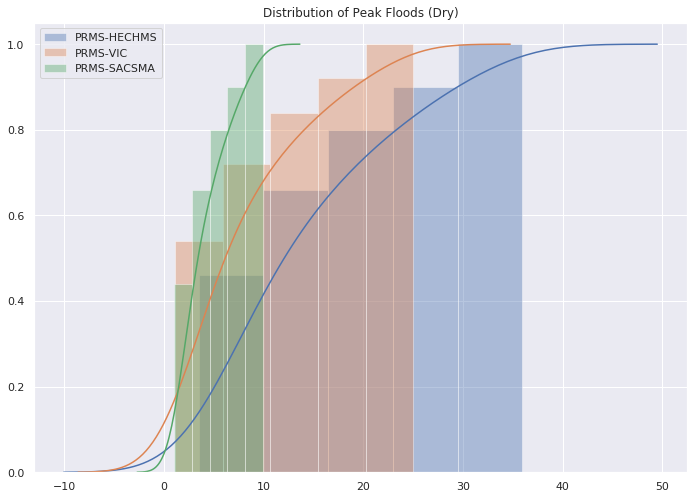

In [13]:
sns.distplot(np.exp(np.linspace(hechmsmax, hechmsmin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax, vicmin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax, sacsmamin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-SACSMA")
plt.title("Distribution of Peak Floods (Dry)")
plt.legend()
plt.show()

# PAST PRECIP

In [14]:
#prmslist =glob.glob(os.path.join(pastprecipdir, '**/*_111_runs_best*.nc'), recursive=True)
hechmslist =glob.glob(os.path.join(pastprecipdir, '**/*_222_runs_best*.nc'), recursive=True)
viclist =glob.glob(os.path.join(pastprecipdir, '**/*_333_runs_best*.nc'), recursive=True)
sacsmalist =glob.glob(os.path.join(pastprecipdir, '**/*_444_runs_best*.nc'), recursive=True)

In [15]:
#prmsmax, prmsmin = maxminlist(prmslist, 'q_routed')
hechmsmax, hechmsmin = maxminlist(hechmslist, 'q_routed')
vicmax, vicmin = maxminlist(viclist, 'q_routed')
sacsmamax, sacsmamin = maxminlist(sacsmalist, 'q_routed')

Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files
Calculating max/min from 5000 netCDF files


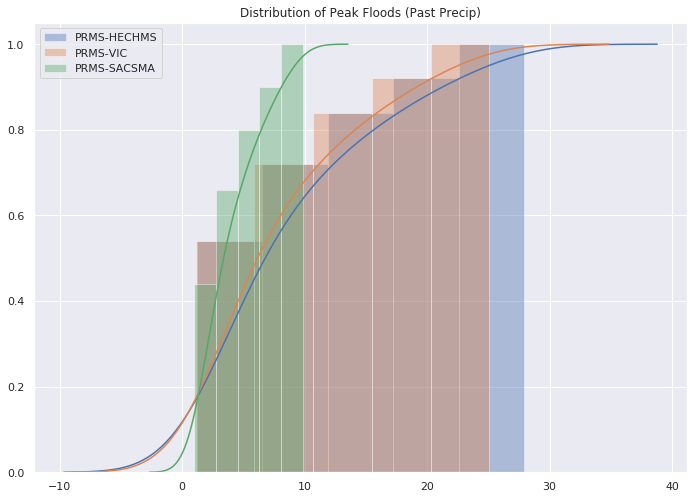

In [16]:
sns.distplot(np.exp(np.linspace(hechmsmax, hechmsmin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-HECHMS")
sns.distplot(np.exp(np.linspace(vicmax, vicmin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-VIC")
sns.distplot(np.exp(np.linspace(sacsmamax, sacsmamin, 50)), hist_kws=dict({'cumulative': True}), kde_kws=dict({'cumulative': True}), label="PRMS-SACSMA")
plt.title("Distribution of Peak Floods (Past Precip)")
plt.legend()
plt.show()